# Data visualization


I have applied K-means clustering to the mean gene expressions trend between 2 and 23 months into eight clusters. I randomly select five genes from each cluster to show their time trend.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
mean_gene_expressions = pd.read_csv("gene_expression_mean_cluster.csv", sep='\t', index_col=0)
std_gene_expressions = pd.read_csv("gene_expression_std_cluster.csv", sep='\t', index_col=0)

In [7]:
gene_cluster = pd.DataFrame({"Gene": mean_gene_expressions.index,
                             "Cluster": mean_gene_expressions["Cluster"]})

In [35]:
subset_gene_cluster = gene_cluster.groupby("Cluster").sample(n=5)

In [36]:
months = mean_gene_expressions.columns[0:12]

In [37]:
subset_mean_gene_expressions = mean_gene_expressions.loc[subset_gene_cluster.index, months]
subset_std_gene_expressions = std_gene_expressions.loc[subset_gene_cluster.index, months]

There are 12 time points. The genes were grouped into eight clusters.

In [38]:
months = list(months)
xvals=np.arange(1, 13)

In [39]:
color_red="#db382c"
color_green="#2f7028"
color_brown="#665223"
color_blue="#344885"
color_magenta="#b538b3"
all_colors = [color_red, color_green, color_brown, color_blue, color_magenta]

In [40]:
# 16 clusters
indices = np.array(np.meshgrid(range(2), range(4))).T.reshape(-1, 2)

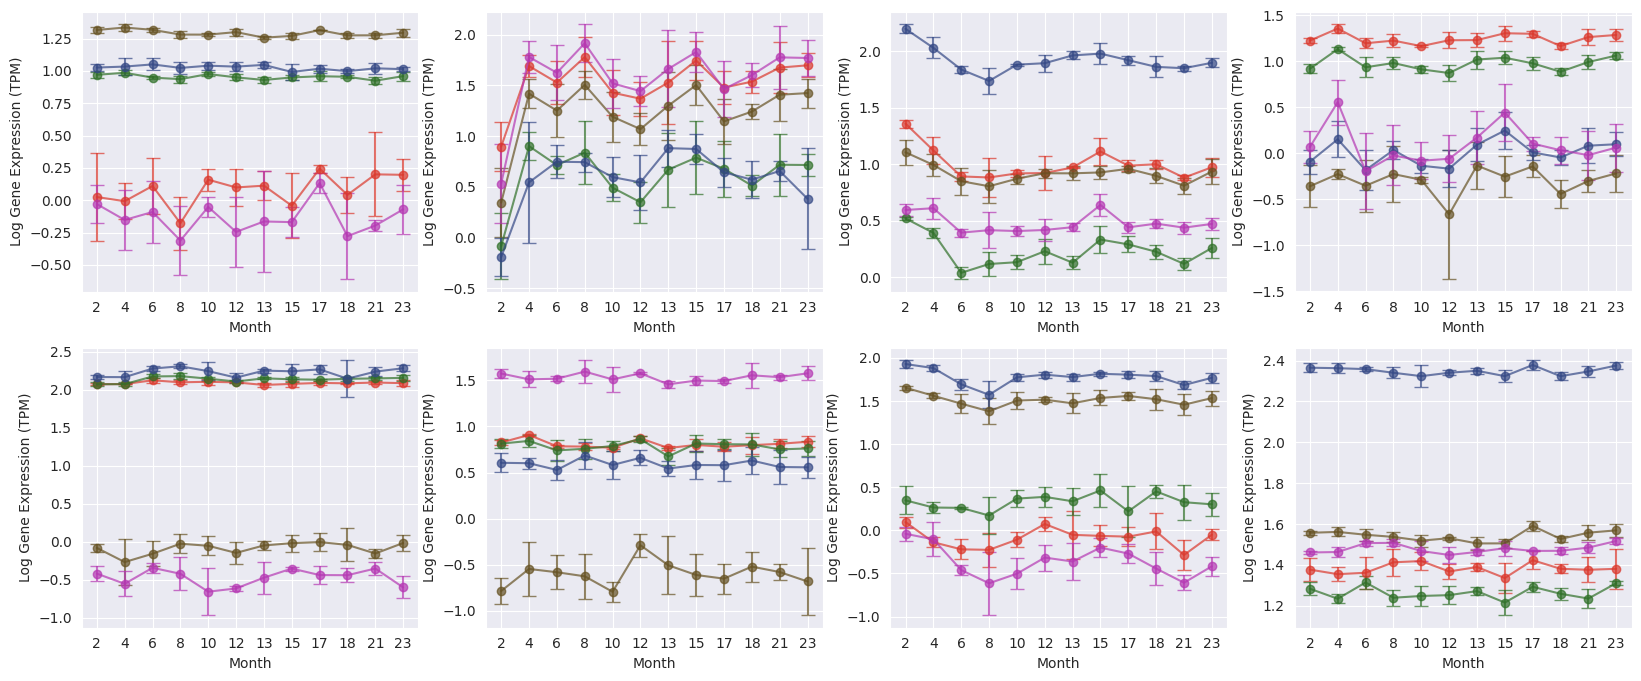

In [41]:
fig1, ax1=plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for i in range(8):

    selected_mean_gene_exp = subset_mean_gene_expressions.iloc[i*5:(i+1)*5, :].to_numpy()
    selected_std_gene_exp = subset_std_gene_expressions.iloc[i*5:(i+1)*5, :].to_numpy()
    for j in range(5):
        mean_logTPM = selected_mean_gene_exp[j, :]
        sd_logTPM = selected_std_gene_exp[j, :]
        ax1[indices[i, 0], indices[i, 1]].errorbar(xvals, mean_logTPM, yerr=sd_logTPM, fmt='-o', color=all_colors[j], capsize=5, alpha=0.7)

    ax1[indices[i, 0], indices[i, 1]].set_xticks(xvals, labels=months)
    ax1[indices[i, 0], indices[i, 1]].set_xlabel('Month')
    ax1[indices[i, 0], indices[i, 1]].set_ylabel('Log Gene Expression (TPM)')

fig1.savefig("sample_expressions_2.png", dpi=400, bbox_inches='tight')